# Hero MotoCorp - Stock Market Data (2000-2020) 

The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a metadata file with some macro-information about the stocks itself. The data spans from 1st January, 2000 to 31st March, 2020. 

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
#from fbprophet import Prophet
plt.style.use('fivethirtyeight') # For plots

Populating the interactive namespace from numpy and matplotlib


D:\arpan\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy



In [24]:
df = pd.read_csv('HEROMOTOCO.csv')
df.head() 

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HEROHONDA,EQ,1145.20,1200.0,1236.80,1171.00,1209.95,1207.60,1209.11,10631,1.285401e+12,NaN,NaN,NaN
1,2000-01-04,HEROHONDA,EQ,1207.60,1200.0,1220.00,1176.00,1200.00,1199.85,1200.93,19849,2.383719e+12,NaN,NaN,NaN
2,2000-01-05,HEROHONDA,EQ,1199.85,1155.0,1178.00,1140.00,1140.00,1143.80,1159.74,2525,2.928355e+11,NaN,NaN,NaN
3,2000-01-06,HEROHONDA,EQ,1143.80,1183.0,1189.95,1150.25,1165.00,1161.40,1167.29,4375,5.106887e+11,NaN,NaN,NaN
4,2000-01-07,HEROHONDA,EQ,1161.40,1140.0,1140.00,1069.00,1105.00,1106.55,1103.52,9093,1.003429e+12,NaN,NaN,NaN


In [3]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5041.000000,5041.000000,5041.000000,5041.000000,5041.000000,5041.000000,5041.000000,5.041000e+03,5.041000e+03,2190.000000,4.532000e+03,4532.000000
mean,1587.564303,1589.055921,1610.530262,1565.761595,1587.486094,1587.670918,1588.375539,4.312743e+05,7.295176e+13,31795.142466,2.504686e+05,0.533601
std,1069.368525,1071.135525,1080.153707,1059.901324,1069.070556,1069.353869,1069.937358,4.456688e+05,1.067992e+14,19489.286202,2.777352e+05,0.146927
min,116.650000,117.000000,123.700000,115.050000,117.000000,116.650000,118.880000,5.960000e+02,2.765216e+10,646.000000,1.642000e+03,0.083700
25%,685.050000,685.000000,699.000000,670.000000,685.000000,685.050000,682.950000,2.001940e+05,1.490085e+13,19398.750000,1.184090e+05,0.432225
50%,1621.450000,1625.000000,1650.400000,1591.150000,1620.000000,1621.450000,1625.120000,3.374540e+05,4.798287e+13,27238.500000,1.935235e+05,0.539950
75%,2499.950000,2500.000000,2534.000000,2471.000000,2499.950000,2499.950000,2504.870000,5.461960e+05,9.906787e+13,38559.250000,3.128938e+05,0.640500
max,4048.950000,4084.000000,4091.950000,3995.000000,4036.050000,4048.950000,4046.970000,1.166595e+07,3.359303e+15,243105.000000,8.862088e+06,1.000000


In [4]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2851
Deliverable Volume     509
%Deliverble            509
dtype: int64

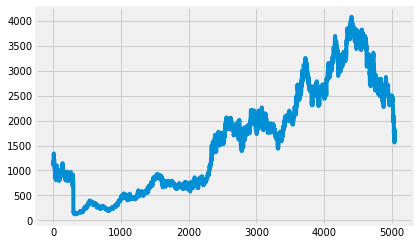

In [10]:
plt.plot(df['Open'])

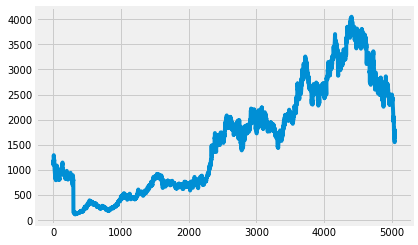

In [11]:
plt.plot(df['Close'])

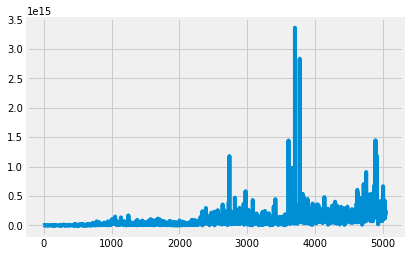

In [12]:
plt.plot(df['Turnover'])

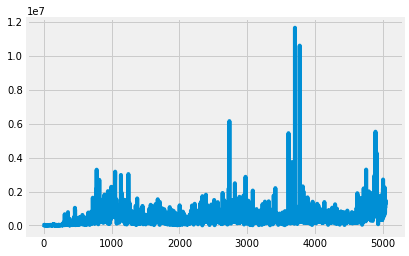

In [13]:
plt.plot(df['Volume'])

# Would be Using LSTM Networks to Predict Open, Close, Turnover and Volume data

In [16]:
# Recurrent Neural Network
# Part 1 - Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
#GPU Training
import keras
import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

Using TensorFlow backend.


# Open

In [57]:
# Feature Scaling
training_set = df.iloc[:3500, 4:5]
testing_set =  df.iloc[3500:, 4:5]

In [58]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (-1, 1))
training_set['Open'] = sc.fit_transform(training_set['Open'].values.reshape(-1,1))
training_set_scaled = training_set.values
testing_set['Open'] = sc.fit_transform(testing_set['Open'].values.reshape(-1,1))
testing_set_scaled = testing_set.values

In [60]:
# Creating a data structure with 400 timesteps and 1 output
X_train = []
y_train = []
for i in range(200, 3500):
    X_train.append(training_set_scaled[i-200:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)   
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [61]:
# Part 2 - Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 4, batch_size = 32)

#Saving Model
#Pickle
import pickle
filename = "model_open.pkl"
pickle.dump(regressor, open(filename, 'wb'))

Epoch 1/4
3300/3300 [==============================] - 103s 31ms/step - loss: 0.0359
Epoch 2/4
3300/3300 [==============================] - 102s 31ms/step - loss: 0.0094
Epoch 3/4
3300/3300 [==============================] - 102s 31ms/step - loss: 0.0084
Epoch 4/4
3300/3300 [==============================] - 105s 32ms/step - loss: 0.0079


In [64]:
# Part 3 - Making the predictions and visualising the results
X_test = []
y_test = []
for i in range(200, testing_set.shape[0]):
    X_test.append(testing_set_scaled[i-200:i, 0])
    y_test.append(testing_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)   
# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

R2 Score of RNN model =  0.9267168483927357


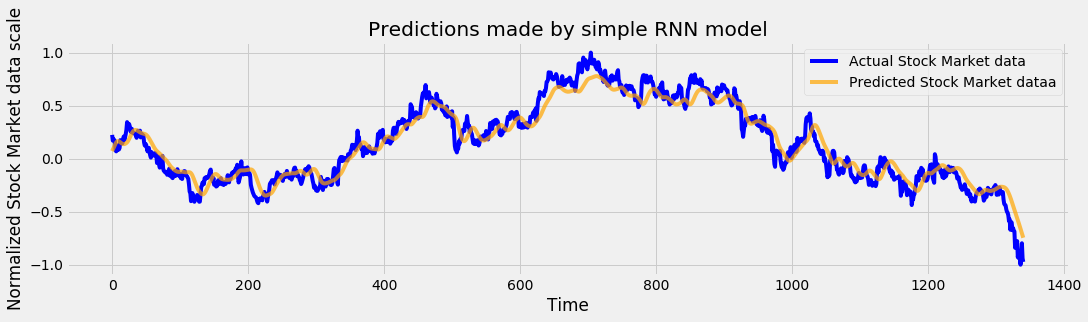

In [65]:
import sklearn.preprocessing
from sklearn.metrics import r2_score
rnn_predictions = regressor.predict(X_test)
rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual Stock Market data')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted Stock Market dataa')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized Stock Market data scale')
    plt.legend()
    plt.show()
    
plot_predictions(y_test, rnn_predictions, "Predictions made by simple RNN model")

# Close

In [52]:
# Feature Scaling
training_set = df.iloc[:3500, 8:9]
testing_set =  df.iloc[3500:, 8:9]

In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (-1, 1))
training_set['Close'] = sc.fit_transform(training_set['Close'].values.reshape(-1,1))
training_set_scaled = training_set.values
testing_set['Close'] = sc.fit_transform(testing_set['Close'].values.reshape(-1,1))
testing_set_scaled = testing_set.values

In [54]:
# Part 2 - Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 3, batch_size = 64)

#Saving Model
#Pickle
import pickle
filename = "model_close.pkl"
pickle.dump(regressor, open(filename, 'wb'))

Epoch 1/3
4100/4100 [==============================] - 131s 32ms/step - loss: 0.0396
Epoch 2/3
4100/4100 [==============================] - 137s 33ms/step - loss: 0.0063
Epoch 3/3
4100/4100 [==============================] - 136s 33ms/step - loss: 0.0057


In [55]:
# Part 3 - Making the predictions and visualising the results
X_test = []
y_test = []
for i in range(400, testing_set.shape[0]):
    X_test.append(testing_set_scaled[i-400:i, 0])
    y_test.append(testing_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)   
# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

R2 Score of RNN model =  0.9272282589609616


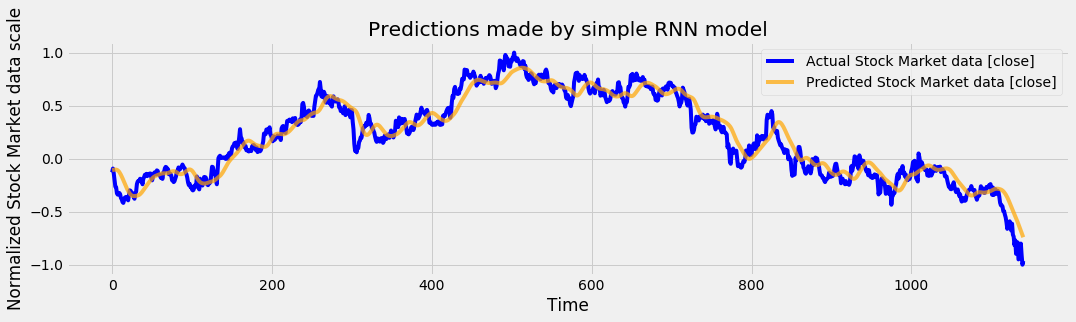

In [56]:
import sklearn.preprocessing
from sklearn.metrics import r2_score
rnn_predictions = regressor.predict(X_test)
rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual Stock Market data [close]')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted Stock Market data [close]')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized Stock Market data scale')
    plt.legend()
    plt.show()
    
plot_predictions(y_test, rnn_predictions, "Predictions made by simple RNN model")